**1. Creating a Synthetic dataset**

In [1]:
import pandas as pd
import numpy as np
import random

# Define districts
districts = ["Colombo", "Gampaha", "Kandy", "Jaffna", "Galle", "Anuradhapura", "Kurunegala", "Batticaloa", "Matara", "Badulla"]

# Initialize dataset
data = []

# Function to simulate risk level
def assign_risk(temp, humidity, rainfall, wind, cases):
    if cases > 50 or (humidity > 85 and rainfall > 150):
        return "High"
    elif cases > 20 or (humidity > 75 and rainfall > 100):
        return "Medium"
    else:
        return "Low"

# Generate 500 rows (10 districts × 50 weeks)
for _ in range(500):
    district = random.choice(districts)
    temp = round(np.random.normal(loc=30, scale=2), 1)
    humidity = np.random.randint(65, 95)
    rainfall = round(np.random.normal(loc=100, scale=50), 1)
    wind_speed = round(np.random.normal(loc=5, scale=2), 1)

    # Simulate cases based on weather
    base_cases = np.clip((humidity / 100) * (rainfall / 10) + random.gauss(5, 10), 0, 120)
    cases_last_week = int(base_cases)

    risk_level = assign_risk(temp, humidity, rainfall, wind_speed, cases_last_week)

    data.append([district, temp, humidity, rainfall, wind_speed, cases_last_week, risk_level])

# Convert to DataFrame
df = pd.DataFrame(data, columns=["district", "temperature", "humidity", "rainfall", "wind_speed", "cases_last_week", "risk_level"])

# Save to CSV
df.to_csv("sri_lanka_weather_dengue.csv", index=False)

print("Synthetic dataset created!")


Synthetic dataset created!


**2. Training the Model**

In [3]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import pickle

# Load data
df = pd.read_csv('sri_lanka_weather_dengue.csv')

# Features and target
X = df[['temperature', 'humidity', 'rainfall', 'wind_speed', 'cases_last_week']]
y = df['risk_level']

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Save model
with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)

**3. Simple Web App with Streamlit**

In [6]:
# streamlit_app.py
import streamlit as st
import pickle
import numpy as np

# Load model
model = pickle.load(open('model.pkl', 'rb'))

st.title("🇱🇰 Dengue Risk Predictor - Sri Lanka")

# Input fields
temp = st.number_input("Temperature (°C)", 20.0, 40.0)
humidity = st.slider("Humidity (%)", 0, 100)
rainfall = st.number_input("Rainfall (mm)", 0.0, 500.0)
wind_speed = st.number_input("Wind Speed (km/h)", 0.0, 20.0)
cases = st.number_input("Dengue Cases Last Week", 0, 500)

if st.button("Predict Risk Level"):
    input_data = np.array([[temp, humidity, rainfall, wind_speed, cases]])
    prediction = model.predict(input_data)[0]
    st.subheader(f"⚠️ Predicted Risk Level: **{prediction}**")


2025-07-07 13:11:45.122 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-07 13:11:45.395 
  command:

    streamlit run /usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-07-07 13:11:45.397 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-07 13:11:45.399 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-07 13:11:45.400 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-07 13:11:45.404 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-07 13:11:45.405 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-07 13:11:45.406 Thread 'MainThread': mi

     Actual Predicted
361  Medium    Medium
73   Medium    Medium
374     Low       Low
155     Low       Low
104     Low       Low


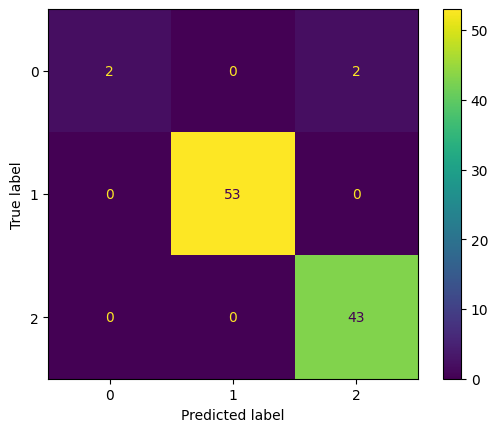

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Display predictions
predicted = model.predict(X_test)
df_result = pd.DataFrame({'Actual': y_test, 'Predicted': predicted})
print(df_result.head())

# Plot confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, predicted)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()
